# Introduction to Machine Learning

We will review concepts covered in this unit and briefly go over concepts from the previous units. Every unit after this will build on all the foundational knowledge so far. Each unit will cover a different class of algorithms or analysis, and many of them are unrelated to each other in terms of mathematical underpinnings. If there is anything that will make the rest of the curriculum easier, it will be thoroughly understanding everything up to this unit.

------------------------

## Theory

**Question** -  Explain whether each scenario is a classification or regression problem,
and indicate whether we are most interested in inference or prediction.
Finally, provide n and p.

(a) We collect a set of data on the top 500 firms in the US. For each
firm we record profit, number of employees, industry and the
CEO salary. We are interested in understanding which factors
affect CEO salary.

(b) We are considering launching a new product and wish to know
whether it will be a success or a failure. We collect data on 20
similar products that were previously launched. For each product
we have recorded whether it was a success or failure, price
charged for the product, marketing budget, competition price,
and ten other variables.

(c) We are interesting in predicting the % change in the US dollar in
relation to the weekly changes in the world stock markets. Hence
we collect weekly data for all of 2012. For each week we record
the % change in the dollar, the % change in the US market,
the % change in the British market, and the % change in the
German market.

a) This is a regression problem because we want CEO salaries in which we use a function. The X variables would be profit, number of employees and industry to predict the Y variable X. Because we want to determine which factors this will be an inference problem. n = 500, p = 3
b) Classification problem (either success or failure for a new product). We are using past data to determine the success of a new product (prediction problem). n = 20, p = 13 (10 variables plus product price, marketing budget, competition price)
c) Regression problem. We are interested in prediction of % change in US dollar. n = 52 (weeks), p = 3 (% US market, % change British market, % change German market)

**Question** - You will now think of some real-life applications for statistical learning.

(a) Describe three real-life applications in which classification might
be useful. Describe the response, as well as the predictors. Is the
goal of each application inference or prediction? Explain your
answer.

(b) Describe three real-life applications in which regression might
be useful. Describe the response, as well as the predictors. Is the
goal of each application inference or prediction? Explain your
answer.

(c) Describe three real-life applications in which cluster analysis
might be useful.

a) i) Predicting a disease (response) based on certain symptoms (these are the predictors). The goal is prediction.
   ii) Predicting defects of a product (response: defect or no defect). Predictors could be batch size, time of batch processing, the number of previous batch runs. This goal is prediction.
   iii) Classifying a business loan going into default or being paid off (response). Predictors could be credit score, income, highest degree achieved, overall debt payments and number of years at current job. This is a prediction problem.
  

b) i) Stock market prices based on specific financial ratios. Earnings per share, debt to equity ratio, dividend yield and current ratio could be predictor variables. The goal is prediction.
  ii) Predicting a data scientist's salary in the southern California area. The predictors would be county location, years experience, industry and cost of living index. Response: data scientist salary for the next year. This would be a inference problem.
  iii) Predicting home price sales in a specific neighborhood (response). Predictors: distance to nearest bus stop, school, recreation center, avg income of household, crime rate. The goal is inference.
 

c) i) Movie ratings (response). Predictors: sexual content, violence, profanity, genre.
   ii) Different types of iris species (response). Predictors: Sepal length, sepal width, petal length and petal width.
   iii) Clustering of NBA players positions beyond the normal 5 (response). Predictors: points, rebounds, steals, blocks, assists, turnovers, fouls, 3 point %, field goal %, free throw %.

## Practical

### College Data Set

This exercise relates to the College data set, which can be found in
the file College.csv. It contains a number of variables for 777 different
universities and colleges in the US. [More Info](http://www.stat.yale.edu/~pollard/Courses/100.fall98/pollard/USnews/usnews.documentation)

**Task** - Read in the CSV, set the College name to the index and print out a summary.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

college = pd.read_csv('College.csv')
college.head()


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [23]:
college = college.rename(columns={'Unnamed: 0' : 'College'})
college.set_index('College')
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**Task** - Plot a scatterplot matrix of the first 10 variables. Plot side-by-side boxplots of `Outstate` vs. `Private`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1257656a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1275af6a0>]], dtype=object)

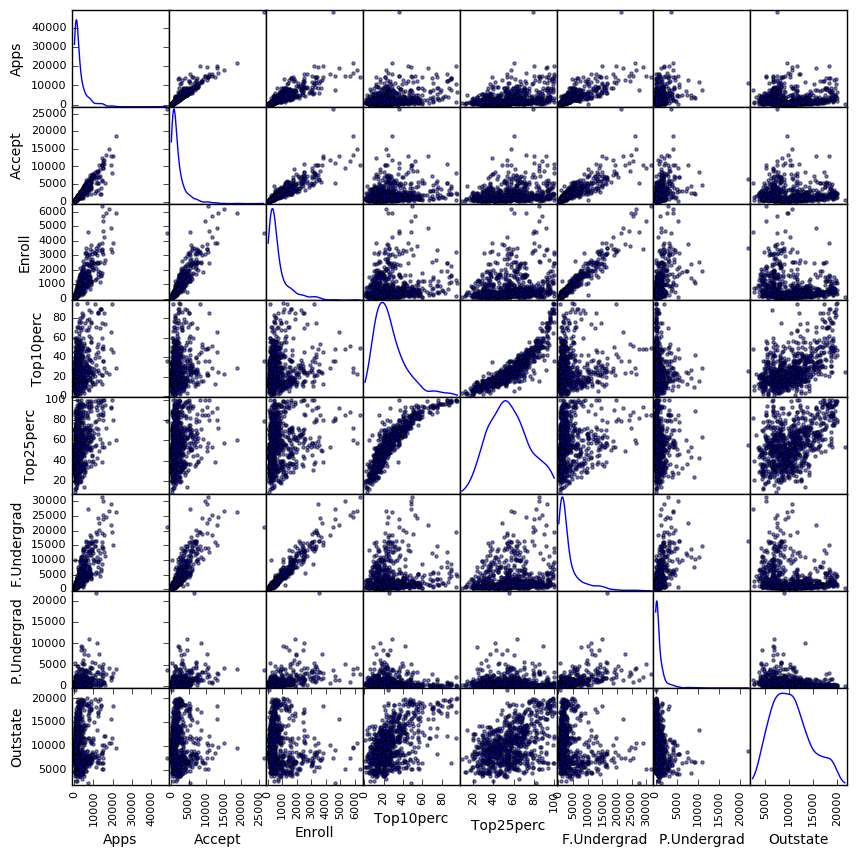

In [13]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(college.iloc[:,0:10], figsize=(10,10), diagonal='kde')

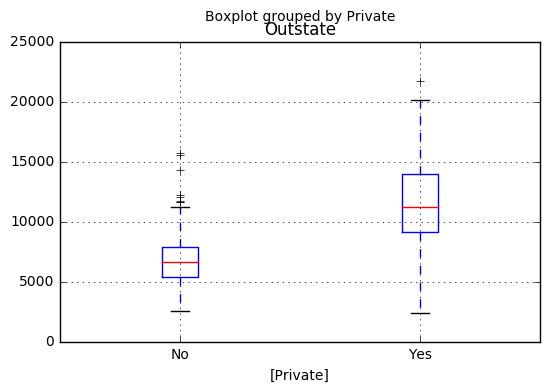

In [21]:
college_new = college[['Private','Outstate']]
college_new.boxplot(by='Private') # plot.box method does not work with this groupby

**Task** -  Create a new qualitative variable, called Elite, by binning
the Top10perc variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10% of their high school
classes exceeds 50%

In [26]:
# use lambda function and map to corresponding value in Top10perc
college['Elite'] = college['Top10perc'].map(lambda x: 'Elite' if int(x) > 50 else 'Non-Elite')

**Task ** - See how many elite universities there are. Compare the summary statistics of elite vs. non-elite.

In [30]:
college.Elite.value_counts()

Non-Elite    699
Elite         78
Name: Elite, dtype: int64

In [35]:
college[college['Elite'] == 'Elite'].describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,5980.564103,2852.602564,1060.717949,67.615385,91.102564,4582.743590,324.935897,15248.564103,5336.794872,594.910256,1188.179487,89.320513,94.089744,10.614103,33.961538,18404.871795,83.384615
std,5025.659837,2616.431918,1048.525544,13.540925,6.057280,5247.170534,596.303752,4115.230670,1112.051612,184.271693,545.748640,7.987805,6.982698,3.878168,14.045790,9651.812255,12.380578
min,346.000000,274.000000,137.000000,51.000000,75.000000,510.000000,1.000000,5224.000000,3048.000000,400.000000,300.000000,59.000000,59.000000,2.900000,6.000000,4957.000000,51.000000
25%,2175.750000,1099.500000,419.750000,56.000000,86.250000,1586.250000,30.000000,12219.000000,4370.000000,500.000000,871.250000,85.250000,92.000000,8.200000,23.000000,12644.250000,74.250000
50%,3849.000000,1903.500000,669.500000,65.500000,93.000000,2483.500000,88.500000,16950.000000,5430.500000,550.000000,1100.000000,91.000000,96.000000,10.400000,33.500000,15944.000000,84.500000
75%,8595.250000,3844.750000,1251.250000,76.750000,96.000000,5209.250000,330.500000,18411.500000,6055.000000,630.000000,1490.000000,95.000000,98.000000,13.050000,44.750000,21420.250000,93.000000
max,19873.000000,12940.000000,5705.000000,96.000000,100.000000,25422.000000,3286.000000,20100.000000,8124.000000,1495.000000,4110.000000,100.000000,100.000000,19.300000,64.000000,56233.000000,100.000000


In [36]:
college[college['Elite'] == 'Non-Elite'].describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,2669.226037,1925.762518,748.645207,23.088698,51.856938,3601.393419,914.480687,9904.165951,4248.251788,544.300429,1357.655222,70.801144,78.097282,14.477539,21.492132,8684.367668,63.463519
std,3572.632737,2416.152186,910.371490,11.243495,16.648554,4798.074931,1581.973999,3640.558534,1040.002025,162.180888,688.411195,15.965102,14.487193,3.776211,11.546512,3246.275298,16.469466
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.000000
25%,695.500000,559.000000,227.500000,15.000000,40.000000,967.500000,117.500000,7070.000000,3526.000000,450.000000,850.000000,61.000000,68.000000,11.850000,12.000000,6620.000000,52.000000
50%,1420.000000,1064.000000,409.000000,22.000000,52.000000,1662.000000,411.000000,9556.000000,4100.000000,500.000000,1210.000000,73.000000,80.000000,13.900000,20.000000,8086.000000,64.000000
75%,3187.500000,2288.500000,826.500000,30.000000,64.000000,3780.500000,1081.000000,12155.000000,4850.000000,600.000000,1700.000000,82.000000,90.000000,16.700000,30.000000,10060.500000,75.000000
max,48094.000000,26330.000000,6392.000000,50.000000,100.000000,31643.000000,21836.000000,21700.000000,7425.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,60.000000,42926.000000,118.000000


**Task** - Produce side-by-side boxplots of Outstate versus Elite.

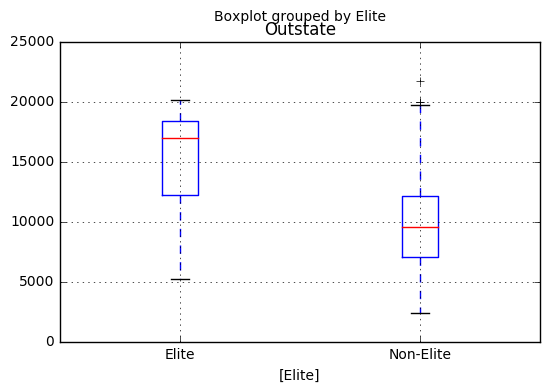

In [31]:
college_new2 = college[['Outstate','Elite']]
college_new2.boxplot(by='Elite')

**Task** - Produce some histograms with differing numbers of bins for a few of the quantitative variables. Play around with dividing the print window into varying numbers of regions and plots.

In [44]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


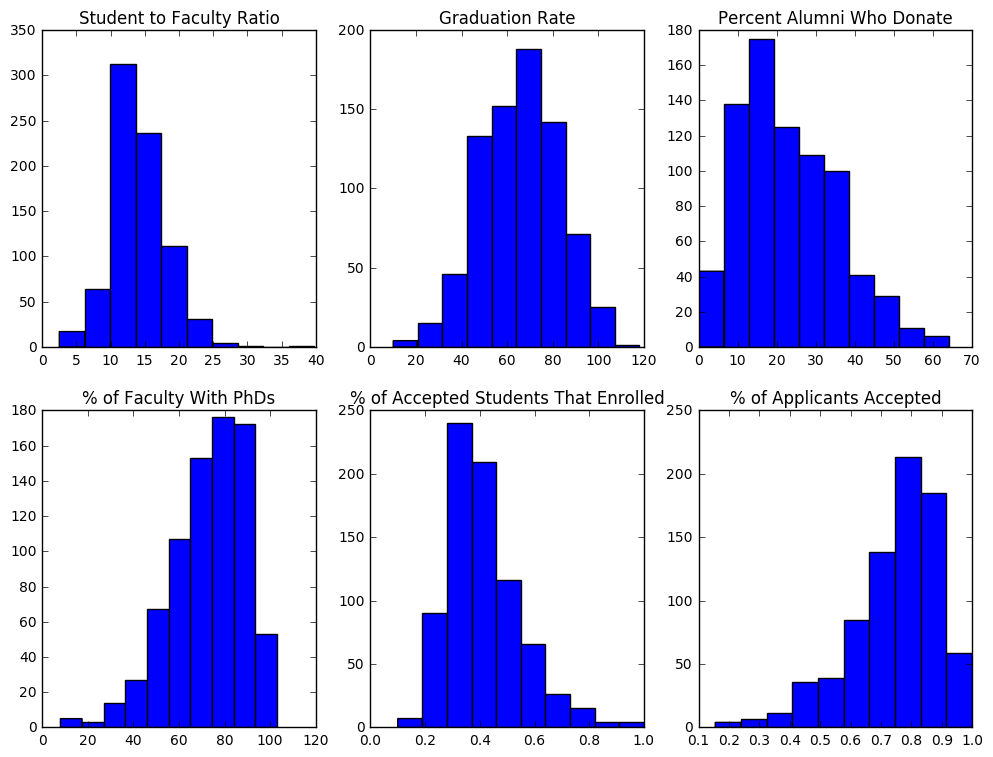

In [53]:
fig, ax = plt.subplots(2, 3, figsize=(12,9))

ax[0,0].hist(college['S.F.Ratio'], bins=10)
ax[0,0].set_title('Student to Faculty Ratio')

ax[0,1].hist(college['Grad.Rate'], bins=10)
ax[0,1].set_title('Graduation Rate')

ax[0,2].hist(college['perc.alumni'], bins=10)
ax[0,2].set_title('Percent Alumni Who Donate')

ax[1,0].hist(college['PhD'], bins=10)
ax[1,0].set_title('% of Faculty With PhDs')

ax[1,1].hist(college['Enroll'] / college['Accept'], bins=10)
ax[1,1].set_title('% of Accepted Students That Enrolled')

ax[1,2].hist(college['Accept'] / college['Apps'], bins=10)
ax[1,2].set_title('% of Applicants Accepted')

**Tasks**
- Continue exploring the data on your own. Write down your observations and some potential questions that have arisen about the data set.

In [56]:
college[college['Grad.Rate'] > 100]

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,Non-Elite


In [57]:
college[college['PhD'] > 100]

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
582,Texas A&M University at Galveston,No,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43,Non-Elite


In [63]:
college['Outstate_Cost'] = college['Outstate'] + college['Room.Board']  + college['Books'] + college['Personal']
college['Outstate_Cost'].describe()

count      777.000000
mean     16688.218790
std       4675.340968
min       6604.000000
25%      13279.000000
50%      16079.000000
75%      19650.000000
max      29095.000000
Name: Outstate_Cost, dtype: float64

(array([  18.,   64.,  119.,  155.,  140.,  106.,   74.,   39.,   43.,   19.]),
 array([  6604. ,   8853.1,  11102.2,  13351.3,  15600.4,  17849.5,
         20098.6,  22347.7,  24596.8,  26845.9,  29095. ]),
 <a list of 10 Patch objects>)

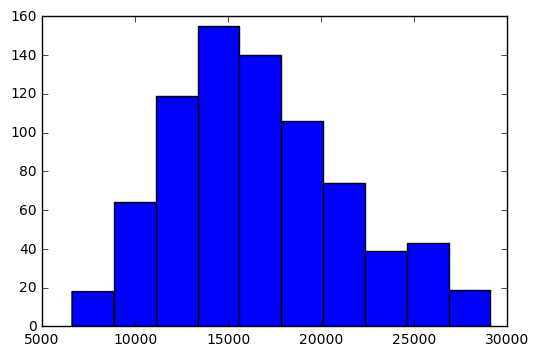

In [64]:
plt.hist(college['Outstate_Cost'], bins=10)

In [68]:
college[college['Outstate_Cost'] > 29000]

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite,Outstate_Cost
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,...,630,2115,96,96,5.8,49,40386,99,Elite,29095


1) Graduation Rate has a max of 118% (Cazenovia College). Could be an error or specific calculation method.

2) Percent of faculty with PhDs has a max of 103 (Texas A&M). Could be an error or specific calculation method.

3) Looks like the most an out-of-state student will spend is $29,095 (Yale University).

### Auto Data Set

This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data. [More Info](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

**Task** - Which of the predictors are quantitative, and which are qualitative?

In [127]:
pd.options.display.max_rows = 999
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [128]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [129]:
auto = auto[auto.horsepower != '?']


All are supposed to be quantitative predictors, except for name, according to the UCI website. However, horsepower is a string for some reason.

In [130]:
# Convert horsepower to int

auto['horsepower'] = auto['horsepower'].astype(float)
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

**Task** - What is the range of each quantitative predictor? What is the mean and standard deviation of each quantitative
predictor?




In [131]:
auto_new = auto.drop('name', axis=1)
auto_new.max() - auto_new.min()

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
dtype: float64

**Task** - - Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [132]:
auto_new2 = pd.concat([auto_new[:10], auto_new[86:]])
auto_new2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,316.000000,316.000000,316.000000,316.000000,316.00000,316.000000,316.000000,316.000000
mean,24.407595,5.373418,187.512658,100.848101,2936.53481,15.717405,77.136076,1.601266
std,7.863285,1.654179,100.114616,35.954147,811.87445,2.713876,3.123464,0.819910
min,11.000000,3.000000,68.000000,46.000000,1649.00000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,75.000000,2213.75000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,145.500000,90.000000,2792.50000,15.500000,77.000000,1.000000
75%,30.550000,6.000000,250.000000,115.000000,3508.00000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.00000,24.800000,82.000000,3.000000


In [133]:
auto_new2.max() - auto_new2.min()

mpg               35.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3348.0
acceleration      16.3
year              12.0
origin             2.0
dtype: float64

**Task** - Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1339959e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x135be6dd8>]], dtype=object)

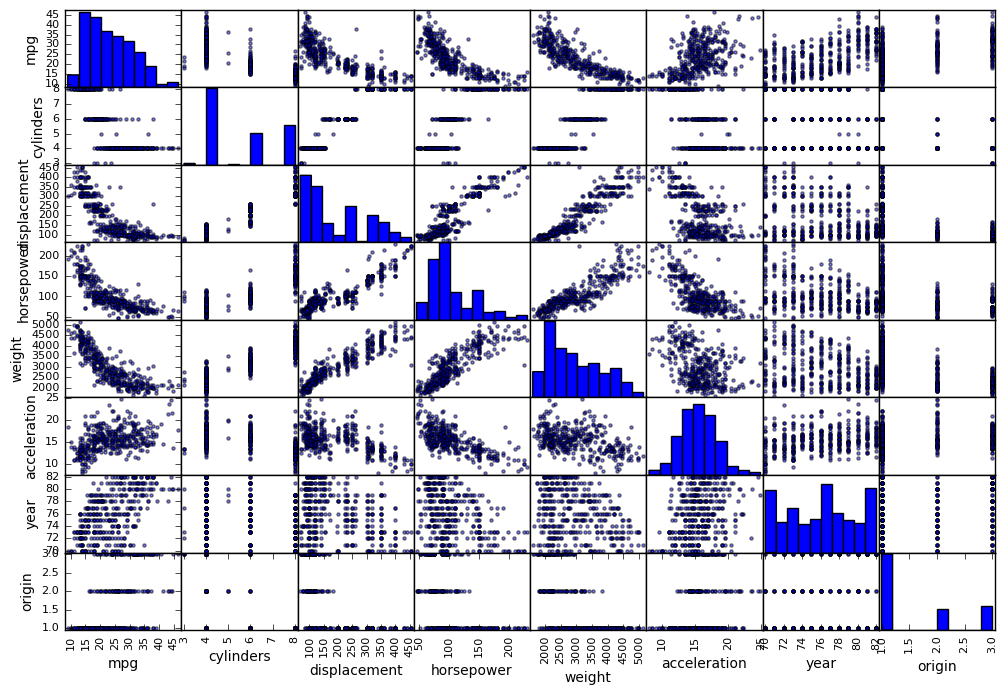

In [135]:
%matplotlib inline
scatter_matrix(auto_new, figsize=(12,8))

**Task** - Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.

Yes, there looks a negative trend with displacement, horsepower, and weight. The other variables look more scattered. However, we may want to be careful for multicollinearity between the predictor variables above.

## Boston Housing Data Set

This exercise involves the Boston housing data set.  [More Info](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

**Task** - To begin, load in the Boston data set. Examine the data set briefly.

In [136]:
boston = pd.read_csv('Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Task** - How many rows are in this data set? How many columns? What
do the rows and columns represent?

In [138]:
boston.shape

(506, 14)

We can reference the link for the definition of variables.

**Task** - Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

In [139]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x146abc470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x144399a90>]], dtype=object)

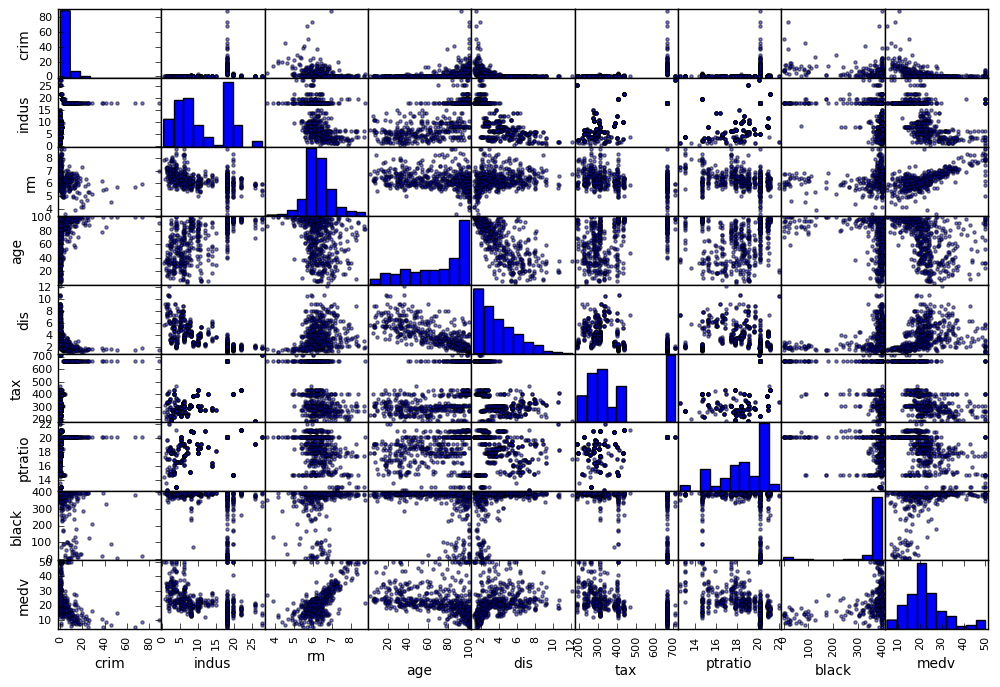

In [143]:
scatter_matrix(boston[['crim', 'indus', 'rm', 'age', 'dis', 'tax', 'ptratio', 'black', 'medv']], figsize=(12,8))

**Task** - Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

In [144]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


- rad, tax, and lstat have a relatively higher positive correlation compared to the others. Higher correlation to rad could mean that accessibility to highways helps foster criminal from reaching specific areas and driving away from those areas. Additionally, the specific population isn't mentioned so it could be higher population areas are highly correlated with these predictors.

**Task** - Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

In [160]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [157]:
boston.sort_values(by='crim', ascending=False).head(10)
# crime rate in specific suburbs are a lot higher than the average of 3.6

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9
413,28.6558,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
417,25.9406,0.0,18.1,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4


In [158]:
boston.sort_values(by='tax', ascending=False).head(10)
# avg tax rate is 408.2 so these suburbs are over 2.5 times more

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
405,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
456,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1
454,9.51363,0.0,18.10,0,0.713,6.728,94.1,2.4961,24,666,20.2,6.68,18.71,14.9


In [159]:
boston.sort_values(by='ptratio', ascending=False).head(10)
# suburbs with the highest pupil to teacher ratio but not significantly different from the avg of 18.5

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96,18.1
127,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,392.11,17.19,16.2
136,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437,21.2,378.25,16.90,17.4
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41,14.4
139,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,17.8
138,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437,21.2,392.04,21.32,13.3
137,0.35233,0.0,21.89,0,0.624,6.454,98.4,1.8498,4,437,21.2,394.08,14.59,17.1
140,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437,21.2,388.08,24.16,14.0


In [163]:
boston[['crim', 'tax','ptratio']].max() - boston[['crim', 'tax','ptratio']].min()

crim        88.96988
tax        524.00000
ptratio      9.40000
dtype: float64

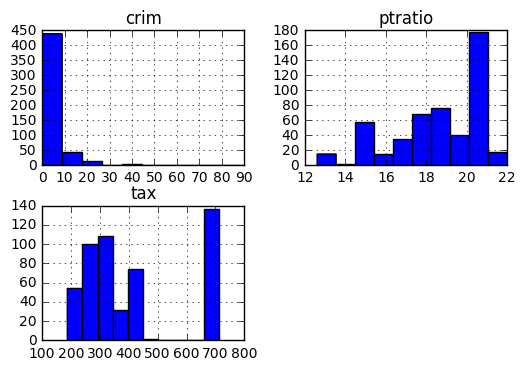

In [164]:
boston2 = boston[['crim','tax','ptratio']].hist()

1) Crime rate has a large range because on average the crime rates are low. However, some suburbs have really high crime rates.

2) Some suburbs have much higher tax rates and others much smaller than the average (2 times less or greater). Thus, the range is wide.

3) Pupil to teacher ratio has a wide range because of a suburb that has a relatively low pupil to teacher ratio of 12.6

**Task** - How many of the suburbs in this data set bound the Charles river?

In [171]:
boston['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

**Task** - What is the median pupil-teacher ratio among the towns in this
data set?

In [169]:
boston['ptratio'].median()

19.05

**Task** - Which suburb of Boston has lowest median value of owneroccupied
homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [172]:
# lowest median value of owneroccupied homes
boston[boston['medv'] == 5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [173]:
boston.max() - boston.min()

crim        88.96988
zn         100.00000
indus       27.28000
chas         1.00000
nox          0.48600
rm           5.21900
age         97.10000
dis         10.99690
rad         23.00000
tax        524.00000
ptratio      9.40000
black      396.58000
lstat       36.24000
medv        45.00000
dtype: float64

1) Crime rate looks to be on the higher end of the range.
2) Tax rate on higher end as well. 
3) Proportion of blacks in town are relatively high.
4) Median value of owner-occupied homes are on the low end.

**Task** - In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [177]:
(boston['rm'] > 7).sum()

64

In [178]:
(boston['rm'] > 8).sum()

13

In [183]:
boston[boston['rm'] > 8].median()

crim         0.52014
zn           0.00000
indus        6.20000
chas         0.00000
nox          0.50700
rm           8.29700
age         78.30000
dis          2.89440
rad          7.00000
tax        307.00000
ptratio     17.40000
black      386.86000
lstat        4.14000
medv        48.30000
dtype: float64

In [184]:
boston.median()

crim         0.25651
zn           0.00000
indus        9.69000
chas         0.00000
nox          0.53800
rm           6.20850
age         77.50000
dis          3.20745
rad          5.00000
tax        330.00000
ptratio     19.05000
black      391.44000
lstat       11.36000
medv        21.20000
dtype: float64

Not much difference in the median values of the suburbs that average 8 or more dwellings vs. the overall median values, except for % lower status of population and median value of owner-occupied homes.